<a href="https://colab.research.google.com/github/dh-thakk/6220-40237364/blob/main/INSE_6220_40237364.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Python Modules**

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy import stats
import seaborn as sns; sns.set()
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from scipy.stats import beta
from scipy.stats import f
from sklearn.neighbors import KNeighborsClassifier
from tabulate import tabulate
from sklearn.preprocessing import label_binarize
from sklearn import svm
from numpy import linalg as LA
from sklearn.multiclass import OneVsRestClassifier

**Upload files into Colaboratory**

In [35]:
from google.colab import files
uploaded = files.upload()

Saving Automobile_6220.csv to Automobile_6220 (1).csv


**Read the Dataset File**

In [3]:
df =pd.read_csv('Automobile_6220.csv')
df.columns
df.head(11)

,mpg,cylinders,displacement,horsepower,weight,acceleration,Class
0,18,4,308.0,130,3504,12.0,2
1,15,7,350.0,165,3693,11.5,2
2,18,8,318.0,150,3436,11.0,2
3,16,8,304.0,150,3433,12.0,2
4,17,8,302.0,140,3449,10.5,2
5,15,8,430.0,198,4341,10.0,2
6,14,8,454.0,220,4354,9.0,1
7,14,8,440.0,215,4312,8.5,1
8,14,7,455.0,225,4425,10.0,2
9,15,7,390.0,190,3850,8.5,2


In [4]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,Class
0,18,4,308.0,130,3504,12.0,2
1,15,7,350.0,165,3693,11.5,2
2,18,8,318.0,150,3436,11.0,2
3,16,8,304.0,150,3433,12.0,2
4,17,8,302.0,140,3449,10.5,2


**Checking for null values**

In [5]:
df.dtypes
df.isnull().sum()
# no null values and hence no replacing
#df.fillna(df.mean(),inplace=True)
#df = df.dropna()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
Class           0
dtype: int64

**Classes**

In [6]:
Y= df['Class']
print(Y)

0      2
1      2
2      2
3      2
4      2
      ..
144    1
145    2
146    2
147    3
148    3
Name: Class, Length: 149, dtype: int64


In [7]:
Y= df['Class']
df.drop(['Class',],axis=1,inplace=True)

** Representing the Count of Date Types**

<Axes: title={'center': 'Count of different varieties of Dates'}>

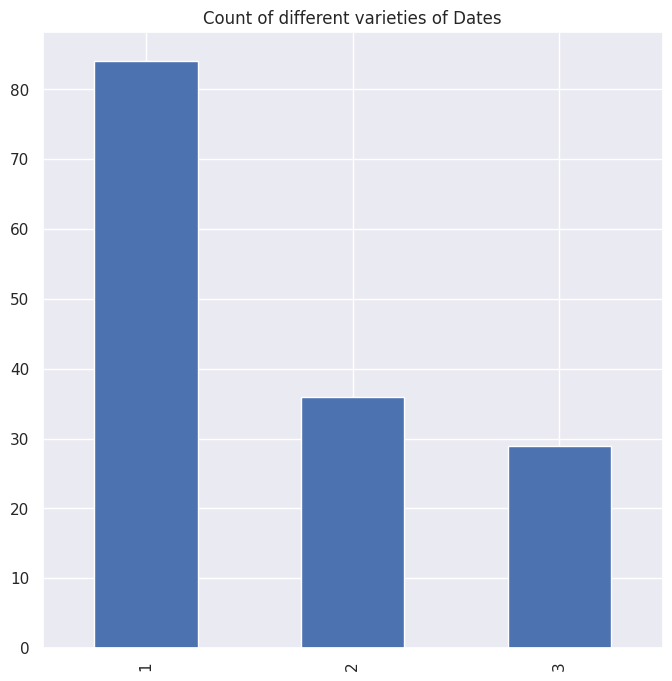

In [8]:
plt. figure(figsize=(8,8))
plt.title("Count of different varieties of Dates")
Y.value_counts().plot(kind = 'bar')

**Normalizing the data**

In [9]:
df = (df - df.mean())/df.std()
# Displaying DataFrame columns.
df.columns
# Some basic information about each column in the DataFrame 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           149 non-null    float64
 1   cylinders     149 non-null    float64
 2   displacement  149 non-null    float64
 3   horsepower    149 non-null    float64
 4   weight        149 non-null    float64
 5   acceleration  149 non-null    float64
dtypes: float64(6)
memory usage: 7.1 KB


**Observations and variables**

In [10]:
observations = list(df.index)
print(observations)
variables = list(df.columns)
print(variables)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148]
['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']


**Data Visualisation**

*Visualisation of the data using a box plot*

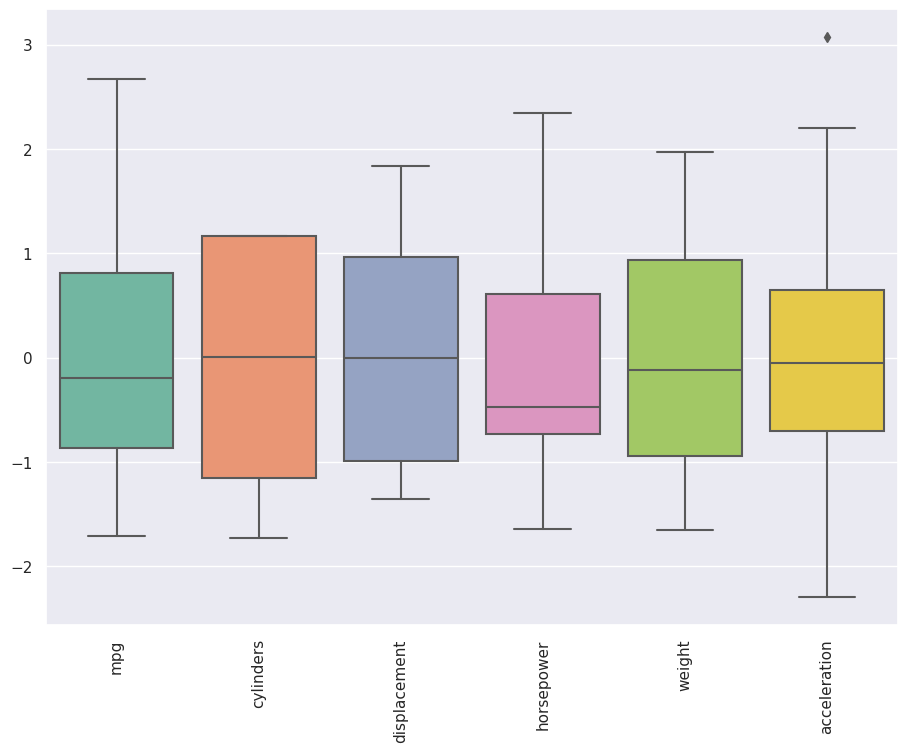

In [11]:
sns.set(rc={'figure.figsize':(11,8)}, font_scale=1)
ax=sns.boxplot(data=df, orient="v", palette="Set2")
plt.setp(ax.get_xticklabels(),rotation=90)
plt.show()

*Stripplot to show the datapoints on top of the boxes*

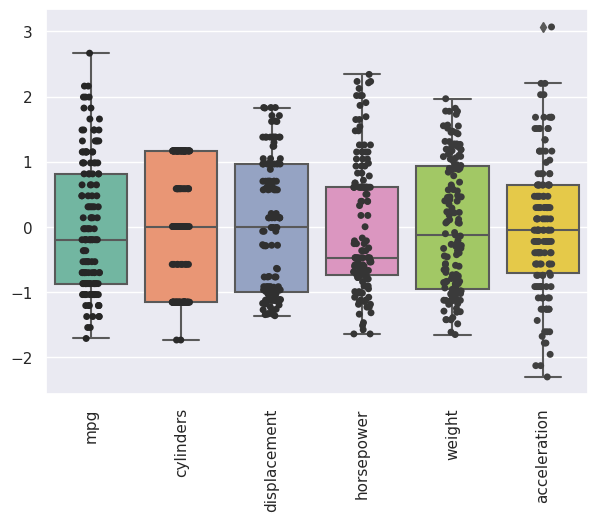

In [12]:
sns.set(rc={'figure.figsize':(7,5)}, font_scale=1)
ax = sns.boxplot(data=df, orient="v", palette="Set2")
ax = sns.stripplot(data=df, color=".25")
plt.setp(ax.get_xticklabels(),rotation=90)
plt.show()

*Pairplot*

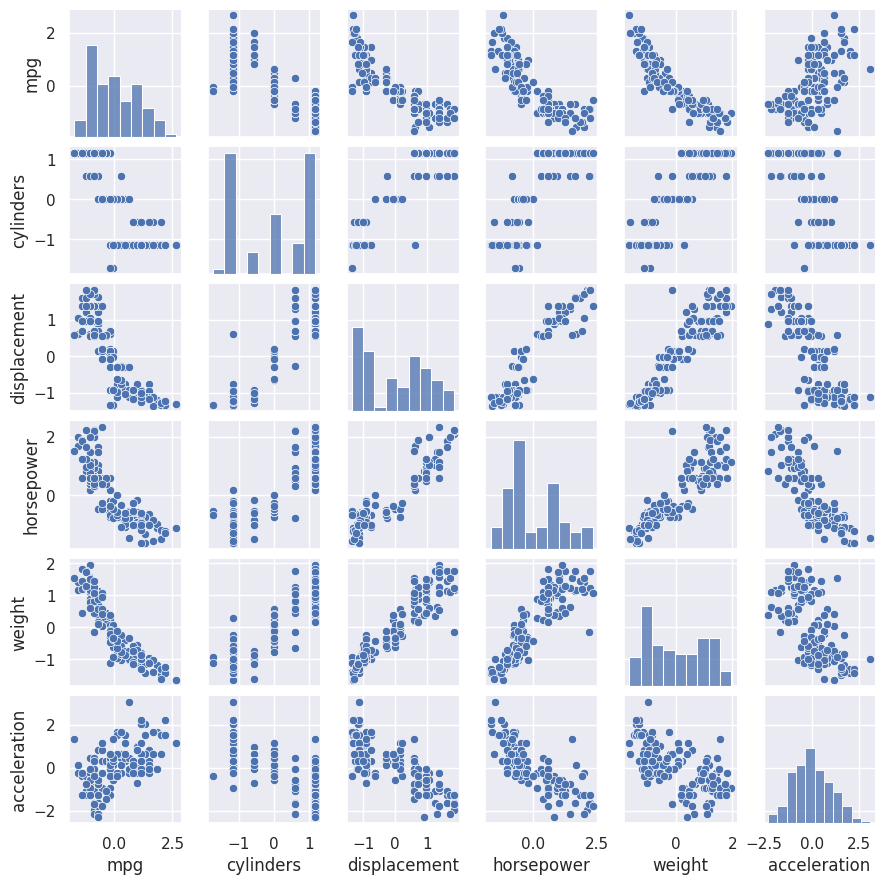

In [13]:
g=sns.pairplot(df,height=1.5)

**Covariance**

Text(0.5, 1.0, 'Covariance matrix')

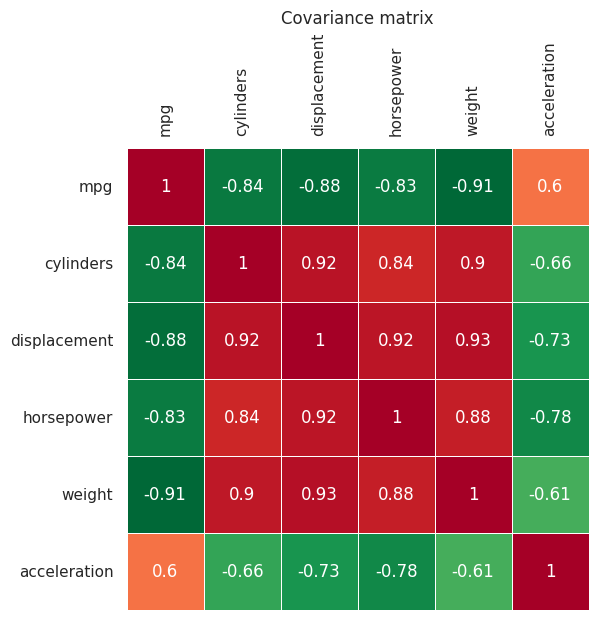

In [14]:
dfc = df - df.mean() #centered data
plt. figure(figsize=(6,6))
ax = sns.heatmap(dfc.cov(), cmap='RdYlGn_r', linewidths=0.5, annot=True, 
            cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
plt.setp(ax.get_xticklabels(),rotation=90)
plt.title('Covariance matrix')

In [15]:
#calculating Eigen vectors & eigen values
w, v = LA.eig(dfc.cov())

In [16]:
#eigen values
w

array([5.10484356, 0.50860035, 0.1567736 , 0.1195075 , 0.06225218,
       0.04802281])

In [17]:
#eigen vectors
v

array([[ 0.40777676,  0.33371227, -0.61095144, -0.50082729,  0.30283052,
         0.08098318],
       [-0.41500722, -0.17085703, -0.74784921,  0.25606542, -0.3824706 ,
         0.16566591],
       [-0.43240778, -0.0511521 , -0.15173139, -0.10477564,  0.37274678,
        -0.79841497],
       [-0.42066979,  0.15329561,  0.19276376, -0.7412015 , -0.45686927,
         0.0653476 ],
       [-0.4216976 , -0.3131804 ,  0.05491289, -0.14992483,  0.62842316,
         0.55107224],
       [ 0.34600389, -0.85746484, -0.06530078, -0.31743892, -0.13937202,
        -0.14345431]])

**Principal component analysis**

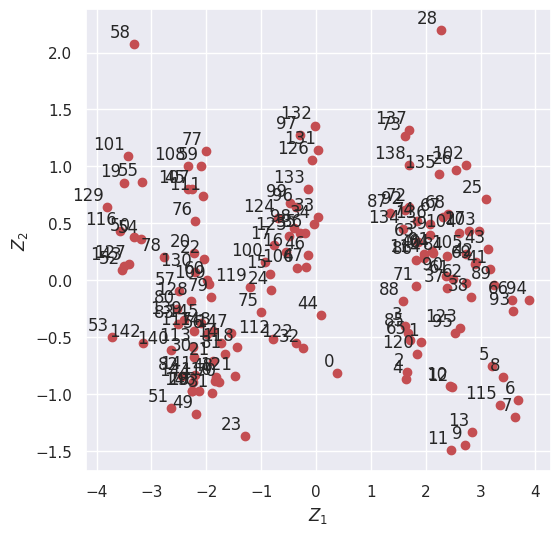

In [18]:
pca = PCA()
pca.fit(df)
Z = pca.fit_transform(df)
plt. figure(figsize=(6,6))
plt.scatter(Z[:,0], Z[:,1], c='r')
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
for label, x, y in zip(observations, Z[:,0], Z[:,1]):
    plt.annotate(label, xy=(x, y), xytext=(-2, 2),
        textcoords='offset points', ha='right', va='bottom')

**Eigenvectors**

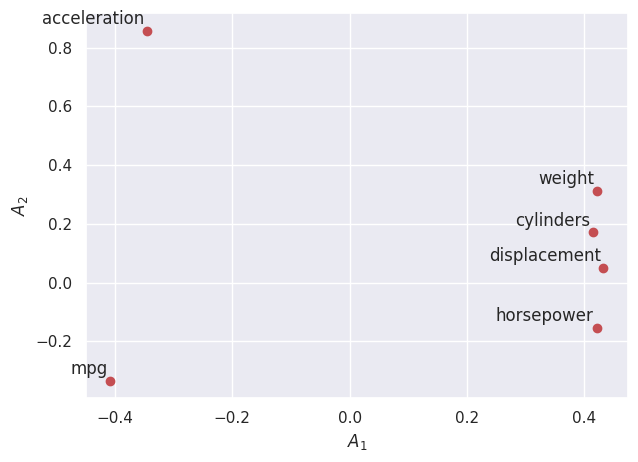

In [19]:
A = pca.components_.T
#print(A.round(4))
plt. figure()
plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$');
for label, x, y in zip(variables, A[:,0],A[:,1]):
    plt.annotate(label, xy=(x, y), xytext=(-2, 2),
        textcoords='offset points', ha='right', va='bottom')

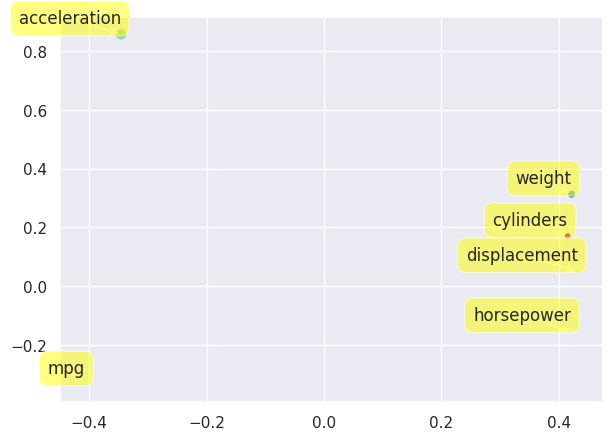

In [20]:
plt. figure()
plt.scatter(A[:,0],A[:,1],marker='o',c=A[:,2],s=A[:,1]*50,
    cmap=plt.get_cmap('Spectral'))
for label, x, y in zip(variables,A[:,0],A[:,1]):
    plt.annotate(label,xy=(x, y), xytext=(0, 5),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

**Scree Plot**

Text(0, 0.5, 'Explained variance')

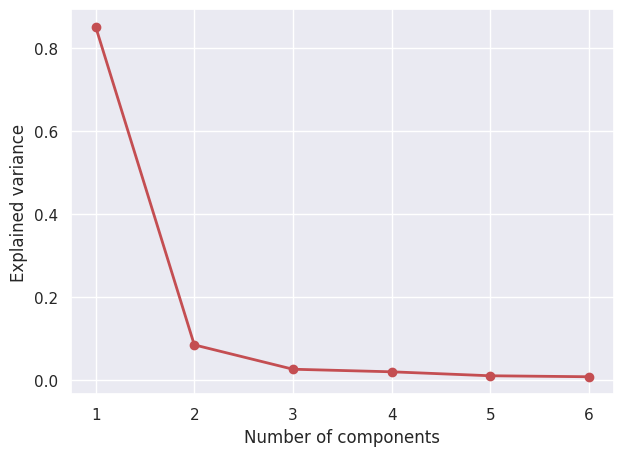

In [21]:
#Eigenvalues
Lambda = pca.explained_variance_
#Scree plot
plt. figure()
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=2)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')

**Explained variance**

[85.1  8.5  2.6  2.   1.   0.8]


Text(0, 0.5, 'Cumulative explained variance')

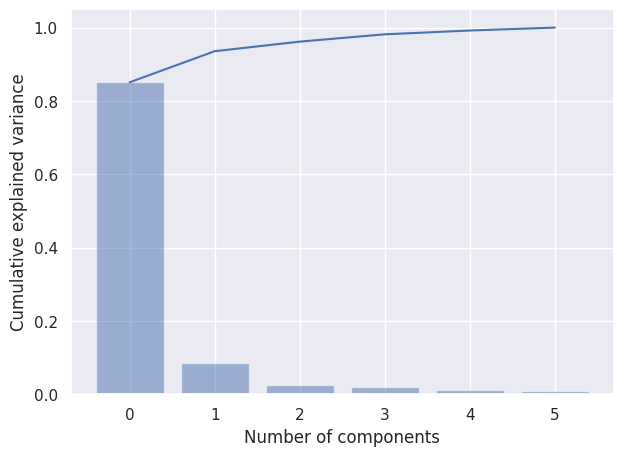

In [22]:
#Explained variance
ell = pca.explained_variance_ratio_
print(ell.round(3)*100)
plt. figure()
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

**Biplot**

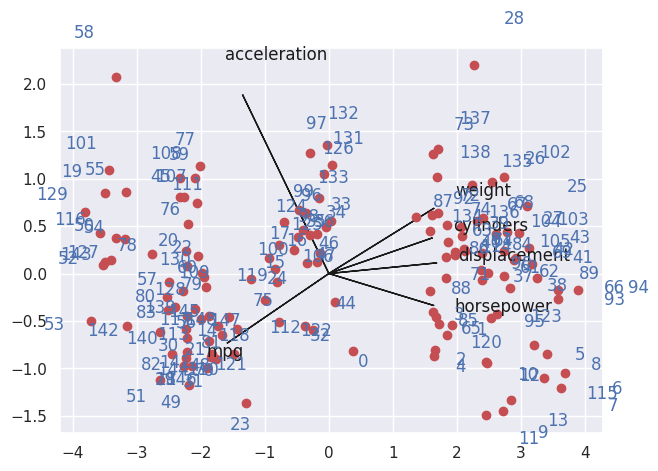

In [23]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0]
A2 = A[:,1]
Z1 = Z[:,0]
Z2 = Z[:,1]

plt. figure()
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
    plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2),
              color='k', width=0.0005, head_width=0.0025)
    plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')
    
for i in range(len(Z1)):
# circles project documents (ie rows from csv) as points onto PC axes
    plt.scatter(Z1[i], Z2[i], c='r', marker='o')
    plt.text(Z1[i]*1.2, Z2[i]*1.2, observations[i], color='b')

**Principal Components**

Text(0.5, 1.0, 'Principal components')

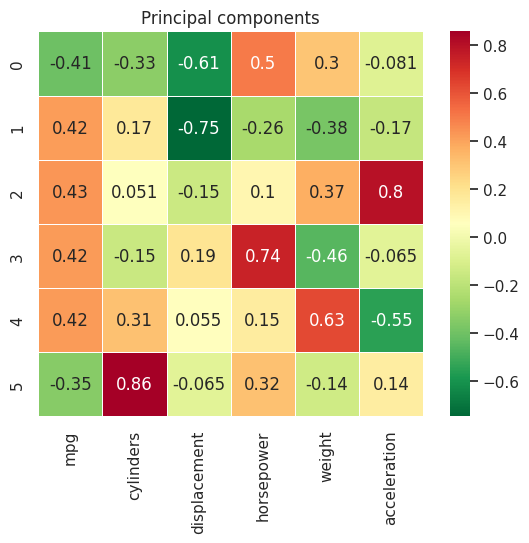

In [24]:
comps = pd.DataFrame(A,columns = variables)
sns.heatmap(comps,cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=True, 
            square=True)
ax.tick_params(labelbottom=False,labeltop=True)
plt.title('Principal components')

**Hotelling's T2 test**

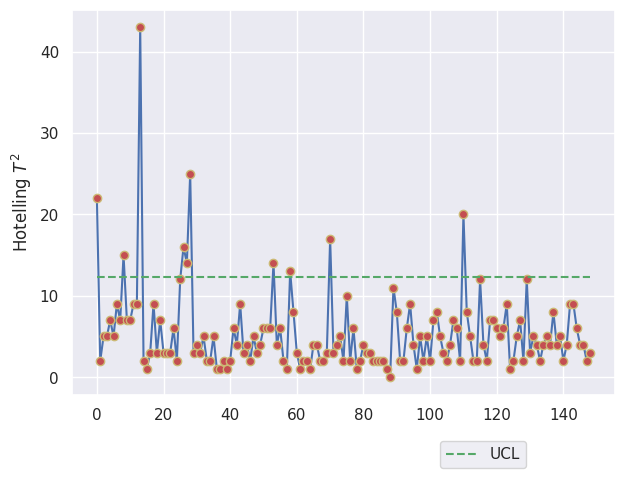

In [25]:
alpha = 0.05
p=Z.shape[1]
n=Z.shape[0]

UCL=((n-1)**2/n )*beta.ppf(1-alpha, p / 2 , (n-p-1)/ 2)
UCL2=p*(n+1)*(n-1)/(n*(n-p) )*f.ppf(1-alpha, p , n-p)
Tsquare=np.array([0]*Z.shape[0])
for i in range(Z.shape[0]):
  Tsquare[i] = np.matmul(np.matmul(np.transpose(Z[i]),np.diag(1/Lambda)) , Z[i])

fig, ax = plt.subplots()
ax.plot(Tsquare,'-b', marker='o', mec='y',mfc='r' )
ax.plot([UCL for i in range(len(Z1))], "--g", label="UCL")
plt.ylabel('Hotelling $T^2$')
legend = ax.legend(shadow=False, ncol=4, bbox_to_anchor=(0.85, -0.1))

**Out of control points**

In [26]:
print (np.argwhere(Tsquare>UCL))

[[  0]
 [  8]
 [ 13]
 [ 26]
 [ 27]
 [ 28]
 [ 53]
 [ 58]
 [ 70]
 [110]]


**Control Charts for Principal Components**

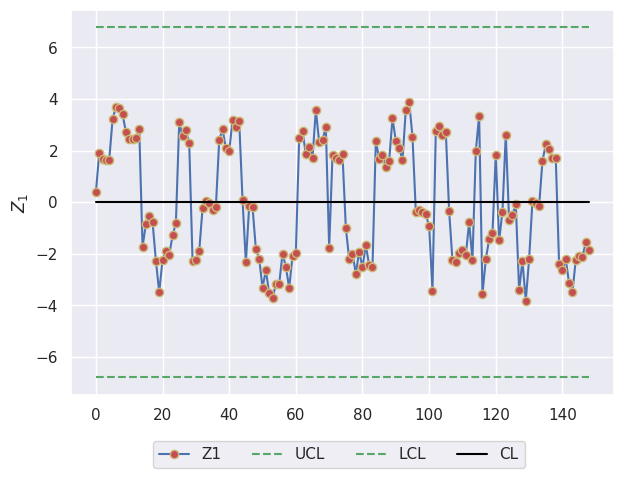

In [27]:
fig, ax = plt.subplots()
ax.plot(Z1,'-b', marker='o', mec='y',mfc='r' , label="Z1")
ax.plot([3*np.sqrt(Lambda[0]) for i in range(len(Z1))], "--g", label="UCL")
ax.plot([-3*np.sqrt(Lambda[0]) for i in range(len(Z1))], "--g", label='LCL')
ax.plot([0 for i in range(len(Z1))], "-", color='black',label='CL')
plt.ylabel('$Z_1$')
legend = ax.legend(shadow=False, ncol=4, bbox_to_anchor=(0.85, -0.1))

**Classification**

In [28]:
#Accuracy of the dataset with two classification algorithms

KNN_model = KNeighborsClassifier(n_neighbors=5)
scoring=['accuracy']
scores_knn_full_data =cross_validate(KNN_model, df,Y,cv=5, scoring=scoring)
scores_knn_Z = cross_validate(KNN_model,Z, Y,cv=5, scoring=scoring)
scores_knn_Z12 = cross_validate(KNN_model, Z[:,:2], Y,cv=5, scoring=scoring)

gnb = GaussianNB()
scores_gnb_full_data = cross_validate(gnb, df, Y,cv=5, scoring=scoring)
scores_gnb_Z = cross_validate(gnb, Z, Y,cv=5, scoring=scoring)
scores_gnb_Z12 = cross_validate(gnb, Z[:,:2], Y,cv=5, scoring=scoring)

scores_dict={}
for i in ['fit_time','test_accuracy']:
  scores_dict["gnb_full_data " + i ]=scores_gnb_full_data[i]
  scores_dict["gnb_Z " + i ]=scores_gnb_Z[i]
  scores_dict["gnb_Z12 " + i ]=scores_gnb_Z12[i]
  scores_dict["knn_full_data " + i ]=scores_knn_full_data[i]
  scores_dict["knn_Z " + i ]=scores_knn_Z[i]
  scores_dict["knn_Z12 " + i ]=scores_knn_Z12[i]

scores_data=pd.DataFrame(scores_dict)
print(scores_data)

   gnb_full_data fit_time  gnb_Z fit_time  gnb_Z12 fit_time  \
0                0.002423        0.001064          0.001104   
1                0.002324        0.001047          0.001080   
2                0.002184        0.001086          0.001044   
3                0.002174        0.001044          0.001028   
4                0.002557        0.001237          0.001033   

   knn_full_data fit_time  knn_Z fit_time  knn_Z12 fit_time  \
0                0.002793        0.001294          0.001108   
1                0.002135        0.000934          0.000908   
2                0.002070        0.000990          0.000864   
3                0.002036        0.000962          0.000827   
4                0.001989        0.000941          0.000811   

   gnb_full_data test_accuracy  gnb_Z test_accuracy  gnb_Z12 test_accuracy  \
0                     0.600000             0.700000               0.666667   
1                     0.633333             0.666667               0.666667   
2       

**Confusion Matrix**

In [29]:
#Confusion matrix for Naive Bayes classification algorithm
X_train, X_test, y_train, y_test = train_test_split(df, Y, test_size=0.2)
gnb= GaussianNB()
gnb.fit(X_train, y_train)
gnb_prediction=gnb.predict(X_test)
cm=confusion_matrix(gnb_prediction, y_test)
cm_df=pd.DataFrame(cm,index=['1','2','3'],
                  columns=['1','2','3'])

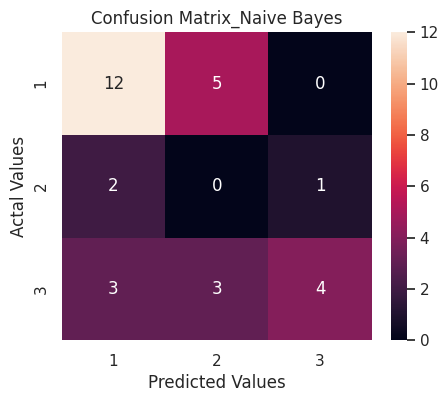

In [30]:
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix_Naive Bayes')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [31]:
#Confusion matrix for k-NN classification algorithm
KNN_model.fit(X_train, y_train)
KNN_prediction = KNN_model.predict(X_test)
cm=confusion_matrix(KNN_prediction, y_test)
cm_df=pd.DataFrame(cm,index=['1','2','3'],
                  columns=['1','2','3'])

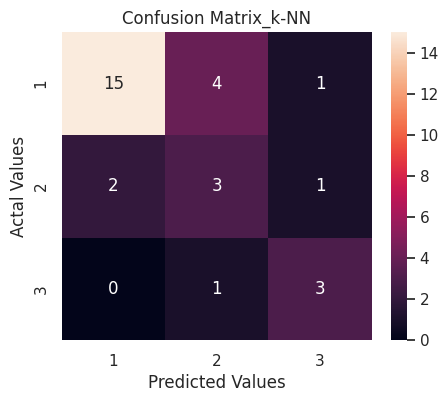

In [32]:
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix_k-NN')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

**Bar Chart**

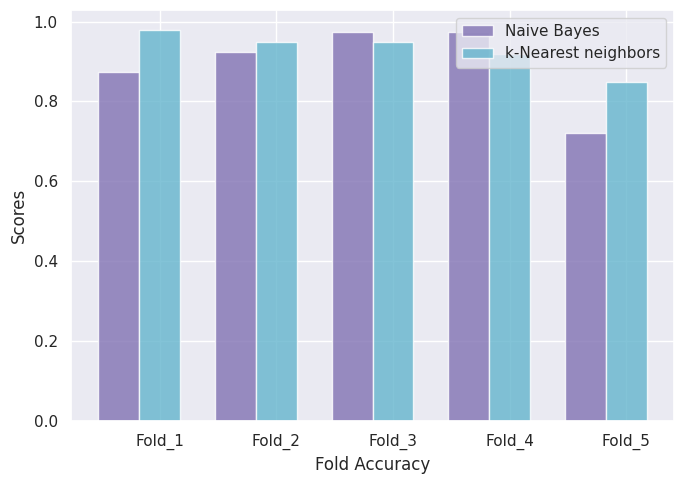

In [33]:
n_groups =5
KNN = (0.98, 0.95, 0.95, 0.92,0.85)
NB = (0.875, 0.925, 0.975, 0.975,0.72)

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, NB, bar_width,
alpha=opacity,
color='m',
label='Naive Bayes')

rects2 = plt.bar(index + bar_width,KNN, bar_width,
alpha=opacity,
color='c',
label='k-Nearest neighbors')

plt.xlabel('Fold Accuracy')
plt.ylabel('Scores')
plt.xticks(index + bar_width, ('Fold_1', 'Fold_2', 'Fold_3', 'Fold_4','Fold_5'))
plt.legend()

plt.tight_layout()
plt.show()